In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

In [4]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
final=data.drop(['User ID','Gender'],axis=1)
final.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
X=data[['Age','EstimatedSalary']]
y=data['Purchased']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10000) 
clf.fit(X_train, y_train)
y_rfpred = clf.predict(X_test)
y_rfpred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [10]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rfpred})
df

,Actual,Predicted
332,0,0
111,0,0
352,1,1
205,0,1
56,0,0
...,...,...
17,1,1
225,0,0
223,1,1
59,0,1


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

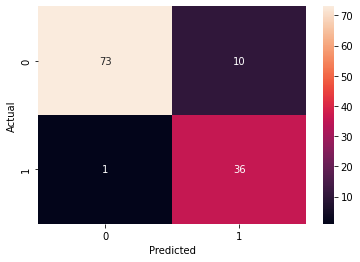

In [12]:
import seaborn as sn # plotting the data
confusion_matrix = pd.crosstab(y_test, y_rfpred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

Test set accuracy: 0.91
Test set auc: 0.93


c:\users\sivashanmugavadivel\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Train set AUC :  1.0


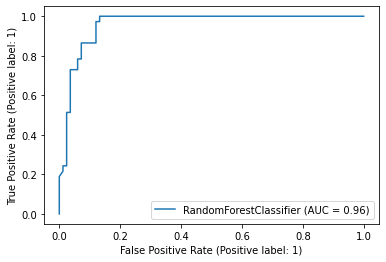

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_rfpred = clf.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_rfpred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_rfpred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(clf, X_test, y_test)


acc = roc_auc_score(y_train, clf.predict(X_train))
print("Train set AUC : ", acc)